### Import the libraries

In [114]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

### Import dataset

In [115]:
parliament = pd.read_csv("merged_coalition.csv")
parliament.head()

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Victor ABENS,1802,Luxembourg,Socialist Group,None,Parti ouvrier socialiste luxembourgeois,1979-1984,07-1979,male,centre-left
1,Gordon J. ADAM,1427,United Kingdom,Socialist Group,None,Labour Party,1979-1984,07-1979,male,centre-left
2,Pietro ADONNINO,957,Italy,European People's Party,None,Democrazia cristiana,1979-1984,07-1979,male,centre-right
3,Jochen van AERSSEN,1797,Germany,European People's Party,None,Christlich Demokratische Union Deutschlands,1979-1984,07-1979,male,centre-right
4,Susanna AGNELLI,943,Italy,Liberal and Democratic Group,None,Partito repubblicano italiano,1979-1984,07-1979,female,centre


In [116]:
# we are interested in analyzing whether some deputies have been reelected during the last three terms more than once
# so, first we create one dataset per term 
term7 = parliament[parliament["term"]== "2009-2014"]
term8 = parliament[parliament["term"]== "2014-2019"]
term9 = parliament[parliament["term"]== "2019-2024"]

# there could be deputies that participated in all three terms, or only in two of them, so we make all
# kind of merges for future analysis
merged789 = pd.concat([term7, term8, term9])
merged78 = pd.concat([term7,term8])
merged79 = pd.concat([term7,term9])
merged89 = pd.concat([term8,term9])

### Network of deputies

In [4]:
# we decided to visualize a network
# we will create one node for each term, that will be connected to all deputies of that term 
# in this way deputies that have been in more than one term will have as many edges as the number
# of terms they participated to

# first we have to create the dataframes that we will use to build the network
# for term 7 for example we will have a node 'term7' linked to all the deputies of term7 by their fullName
dati7 = {'source': 'term7', 'target': [*term7['fullName'].tolist()]}
df1 = pd.DataFrame(dati7, columns=['source','target'])

dati8 = {'source': 'term8', 'target': [*term8['fullName'].tolist()]}
df2 = pd.DataFrame(dati8, columns=['source','target'])

dati9 = {'source': 'term9', 'target': [*term9['fullName'].tolist()]}
df3 = pd.DataFrame(dati9, columns=['source','target'])

In [5]:
# we do all the possible merges for our future analysis
result = pd.concat([df1, df2, df3])
result78 = pd.concat([df1, df2])
result79 = pd.concat([df1, df3])
result89 = pd.concat([df2, df3])

In [6]:
# Let's check if some deputies have been elected for more than one term
# among the last three
# we do it by checking if in the column 'target' of the created dataframe 'result' there is any duplicate
result['target'].duplicated().any()

True

In [7]:
# Let's create a graph from the Pandas DataFrame 'result' containing our edge list
g = nx.from_pandas_edgelist(result, source='source', target='target')

In [8]:
# we build a color map because we want to colore each node in the graph according to the number of terms it is linked to
# moreover we color the central nodes indicating the term in black

color_map = []
nodes = list(g.nodes)
terms = ['term7', 'term8', 'term9']
nodes = list(g.nodes)
for node in g:
    if node in terms:
        color_map.append('black')
    elif sum(result[result['target'] == node].value_counts()) == 3:
        color_map.append('red')
    elif sum(result[result['target'] == node].value_counts()) == 2: 
        color_map.append('green')
    else:
        color_map.append('blue')
        
color_map

['black',
 'blue',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'red',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'blu

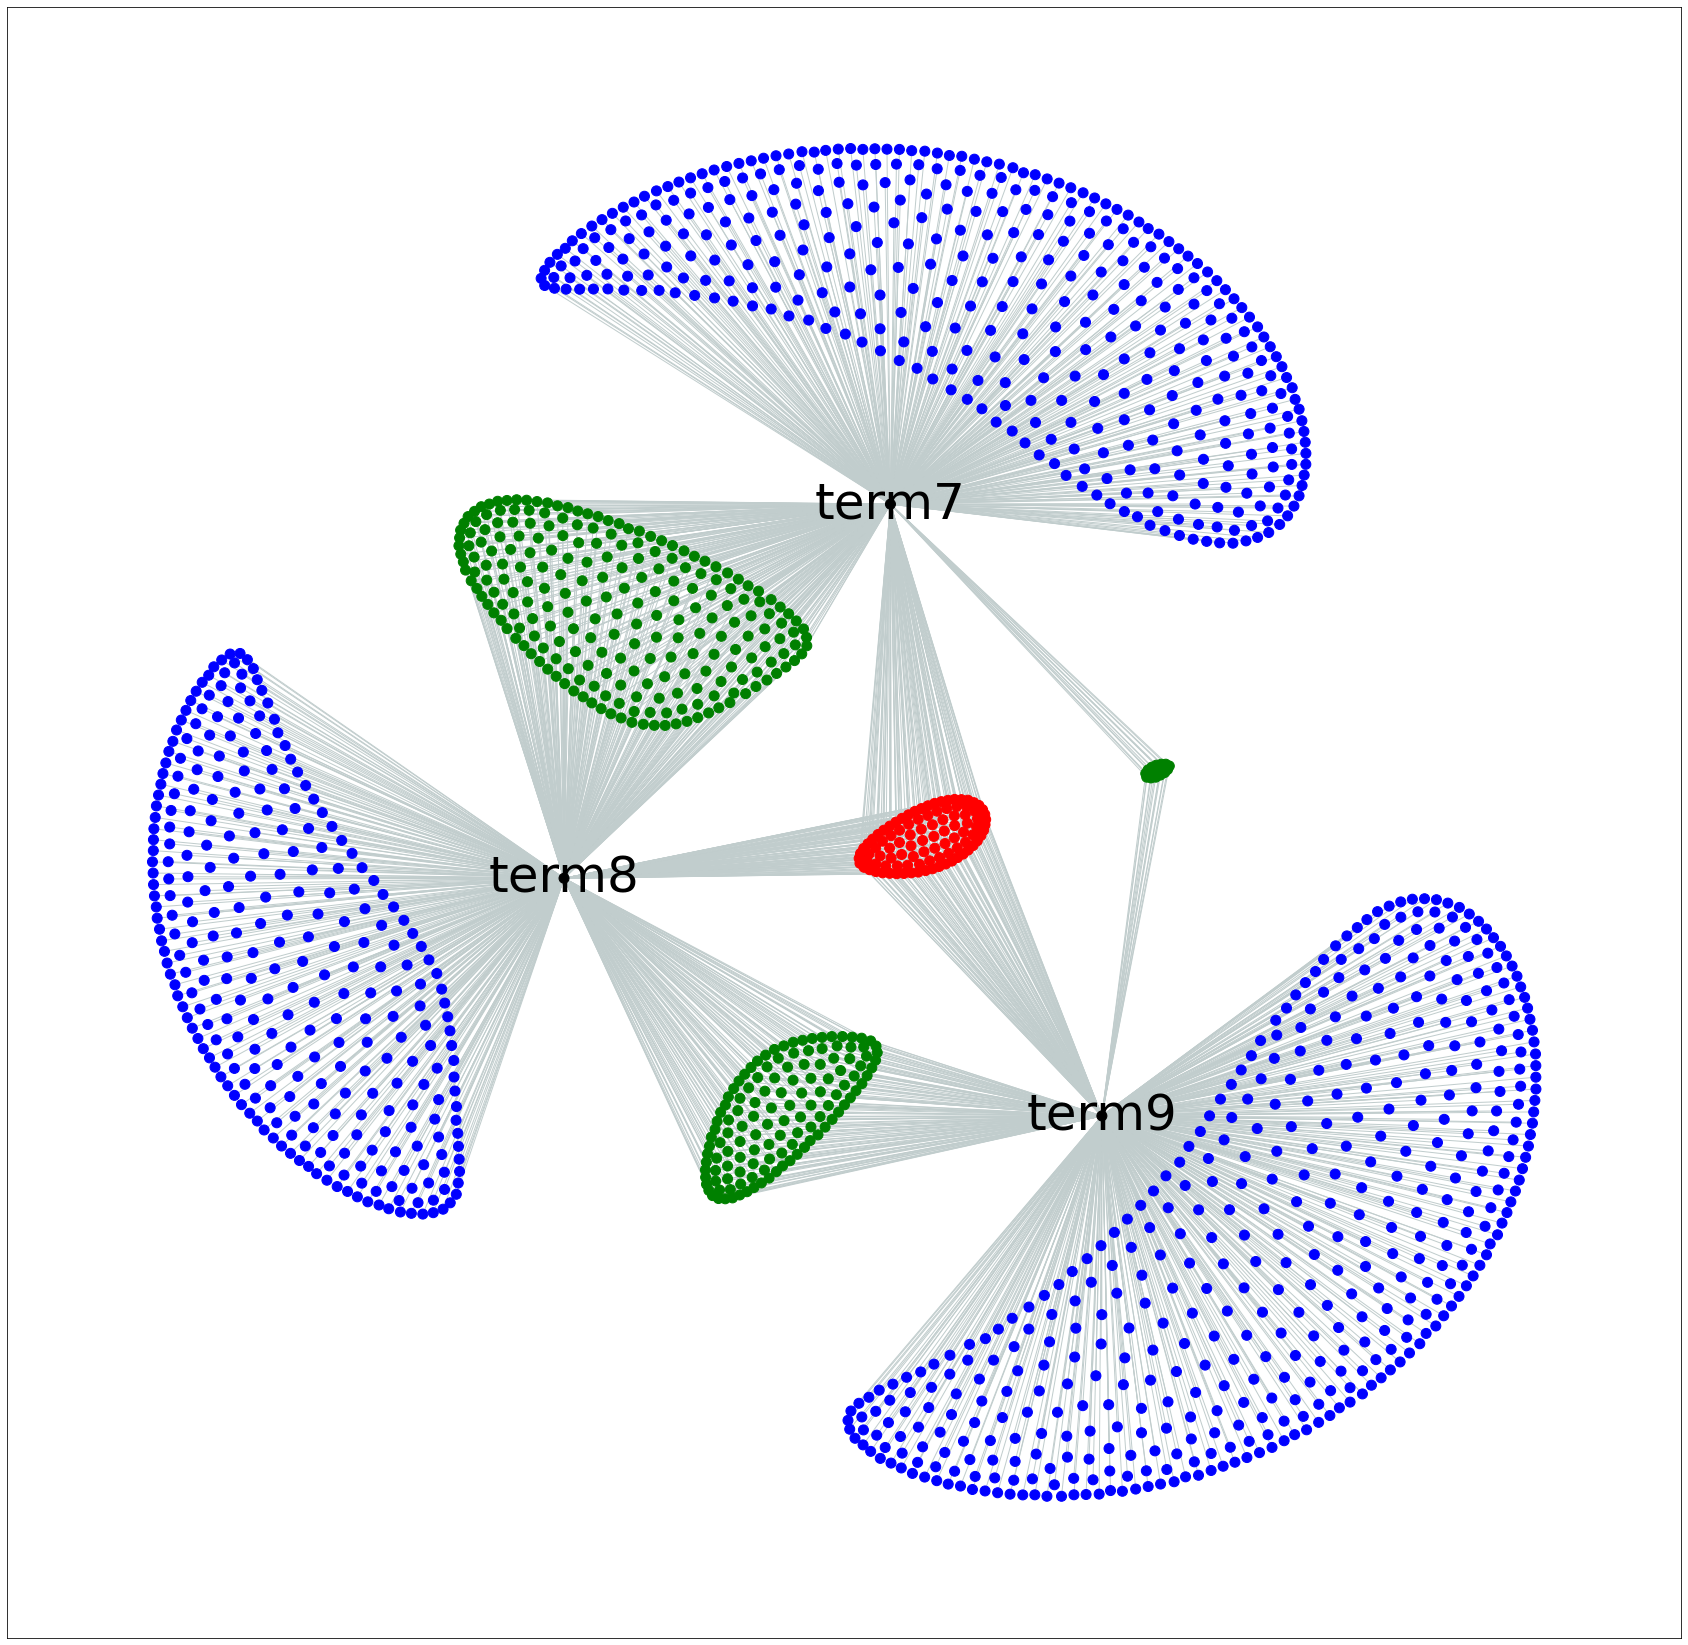

In [9]:
# we set the edge color to be lightgray and the node size, since we have a lot of nodes, to be 100 (smaller than the default one)
# the best layout for our case is kamada kawai
# the only labels that we want to display are the ones indicating the term

options = {
    'edge_color': '#C1CDCD',
    'node_size': 100
}

fig = plt.figure(1, figsize=(30, 30))

nx.draw_networkx(g,with_labels= False, **options, pos = nx.kamada_kawai_layout(g), node_color=color_map)

nx.draw_networkx_edges(g, pos = nx.kamada_kawai_layout(g), alpha = 0.5, width = 0.0001)

labels = {} 
x = ['term7', 'term8', 'term9']
for i in range(0,len(x)):
    for node in g.nodes():
        if node == x[i]:
        #set the node name as the key and the label as its value 
            labels[node] = node
nx.draw_networkx_labels(g,nx.kamada_kawai_layout(g),labels,font_size=50,font_color='#000000')

plt.savefig("Graph.png", format="PNG")


### Deputies re-elected

In [117]:
# we want to focus on the deputies that have been elected in all three terms (the nodes colored in red)
# so we create a dataset with all deputies that have been elected for all three terms
members789 = pd.DataFrame(columns = merged789.columns)

for node in g:
    if sum(result[result['target'] == node].value_counts()) == 3:
        members789 = pd.concat([members789, merged789[merged789['fullName'] == node]], ignore_index=True)
    
members789 = members789.drop_duplicates(subset=['fullName'])
members789["mandate_length"] ="3 terms"

In [118]:
# create a dataset with all deputies that have been elected for terms 7 and 8
members78 = pd.DataFrame(columns = merged78.columns)

for node in g:
    if sum(result78[result78['target'] == node].value_counts()) == 2:
        members78 = pd.concat([members78, merged78[merged78['fullName'] == node]], ignore_index=True)

members78 = members78.drop_duplicates(subset=['fullName'])
members78["mandate_length"] ="2 terms (7-8)"

In [119]:
# create a dataset with all deputies that have been elected for term 8 and 9
members89 = pd.DataFrame(columns = merged89.columns)

for node in g:
    if sum(result89[result89['target'] == node].value_counts()) == 2:
        members89 = pd.concat([members89, merged89[merged89['fullName'] == node]], ignore_index=True)
        
members89 = members89.drop_duplicates(subset=['fullName'])
members89["mandate_length"] ="2 terms (8-9)"

In [120]:
# create a dataset with all deputies that have been elected for term 7 and 9
members79 = pd.DataFrame(columns = merged79.columns)

for node in g:
    if sum(result79[result79['target'] == node].value_counts()) == 2:
        members79 = pd.concat([members79, merged79[merged79['fullName'] == node]], ignore_index=True)
        
members79 = members79.drop_duplicates(subset=['fullName'])
members79["mandate_length"] ="2 terms (7-9)"

In [121]:
#we merge all the four datasets previously created in order to plot the interactive bar chart that will be displayed in Dash
merged_network = pd.concat([members78, members89, members79, members789], axis=0)

In [102]:
#saving the file
merged_network.to_csv("merged_network.csv", index=False)

#### Let's investigate the composition of these deputies.
#### What is their gender? What is their political orientation? 

##### To do so we realized a stacked bar chart with plotly express, where:
##### - x axis: political orientation
##### - y axis: count
##### - color: gender
##### In this way, we can see how many male and female deputies were re-elected and the proportion in each political orientation.
##### In dash we will create a dropdown in which we can choose which type of re-elected member to investigate ( those that were re-elected only for term 8, those re-elected for all the three terms etc..)

In [122]:
#function that create the bar chart on Dash

def create_bar_chart(mandate):
    filtered_df = merged_network[merged_network['mandate_length'] == mandate]
    grouped = filtered_df.groupby(['orientation', 'gender']).size().reset_index(name='count')
    # Plot the stacked bar chart using Plotly Express
    category_order = ['female', 'male']
    fig6 = px.bar(grouped, x='orientation', y='count', color='gender', barmode='stack',category_orders={'gender': category_order},
                 labels={'orientation': 'Orientation', 'count': 'Count', 'gender': 'Gender'},
    color_discrete_map={"female": "#FF92A5", "male": "#72B7B2"},)
    
    fig6.update_layout(showlegend=True, legend_title_text='Gender',plot_bgcolor='#eeeeee', paper_bgcolor="#eeeeee", hoverlabel=dict(font=dict(color='white')))
    fig6.update_xaxes(categoryorder='array', categoryarray= ['left', 'centre-left', 'centre', 'centre-right', 'right', 'Non aligned'])
    return fig6

In [123]:
# This is for example the plot of term 9
fig = create_bar_chart('3 terms')
plot(fig)

'temp-plot.html'

### Pie charts e bar charts

#### We have also realized the following visualization focusing on the gender composition only and on the home country of deputies, but we decided to not add them to our dashboard because they were not particularly informative and where not really useful for our analysis

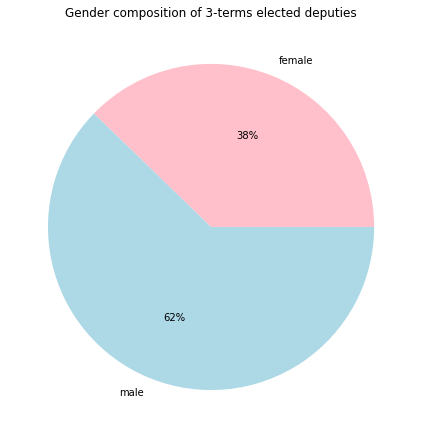

In [124]:
df_plt1 = members789.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt1['Count'], labels = df_plt1.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of 3-terms elected deputies')
plt.savefig("gender1.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

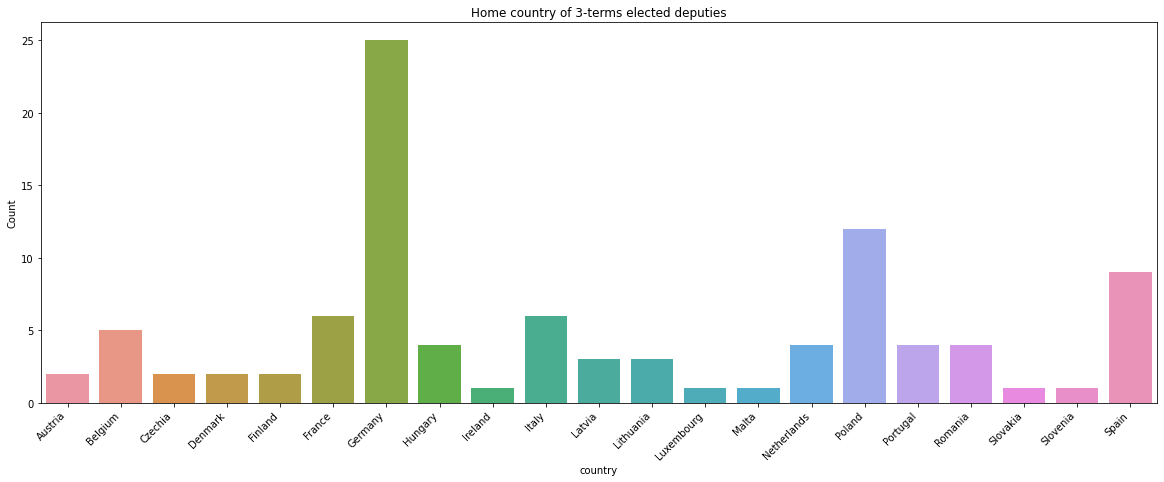

In [125]:
df_plt1 = members789.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c = sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1)
c.set(title='Home country of 3-terms elected deputies')
c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right')
c.set_ylabel('Count')

#### Initially, we did them also for deputies that have been elected for two terms only

In [ ]:
# Members of term 7 re-elected just for term 8

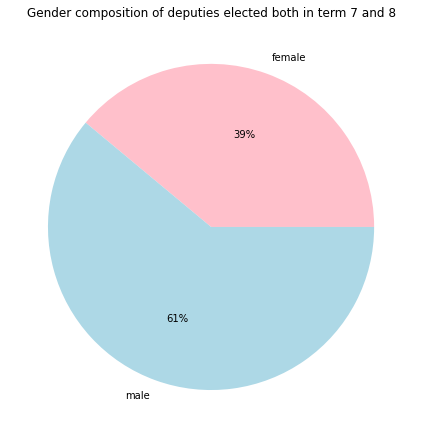

In [126]:
df_plt2 = members78.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt2['Count'], labels = df_plt2.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 8')
plt.savefig("gender2.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

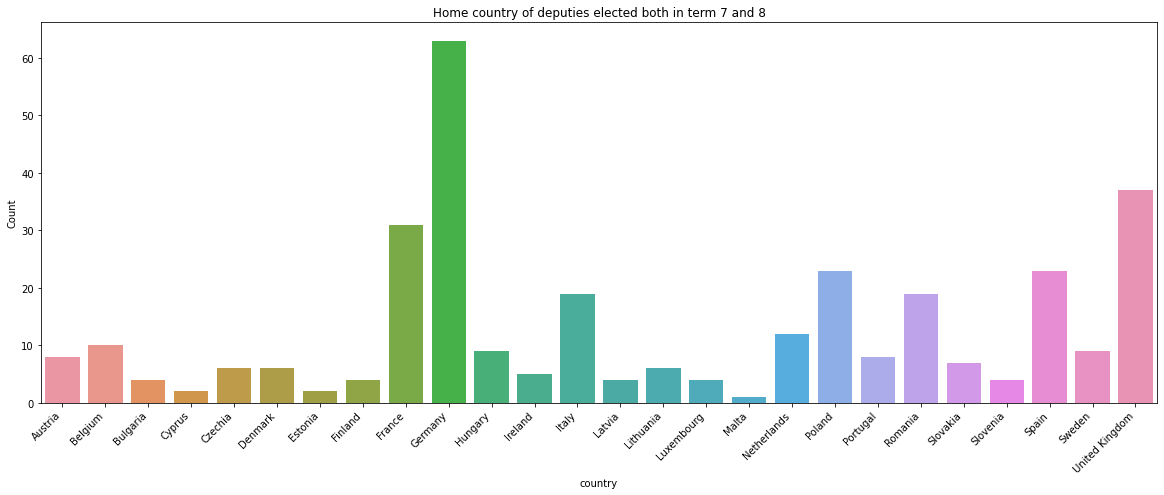

In [127]:
df_plt2 = members78.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c1 = sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2)
c1.set(title='Home country of deputies elected both in term 7 and 8')
c1.set_xticklabels(c1.get_xticklabels(), rotation=45, horizontalalignment='right')
c1.set_ylabel('Count')

In [ ]:
# Members of term 7 re-elected just for term 9

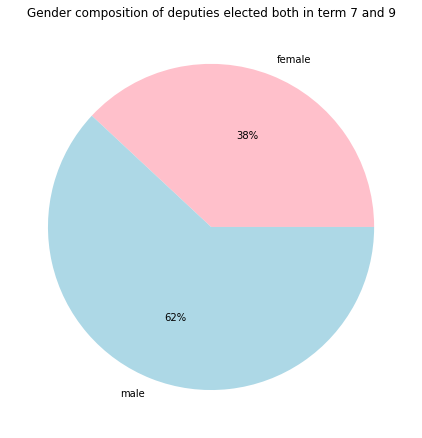

In [128]:
df_plt3 = members79.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt3['Count'], labels = df_plt3.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 9')
plt.savefig("gender3.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

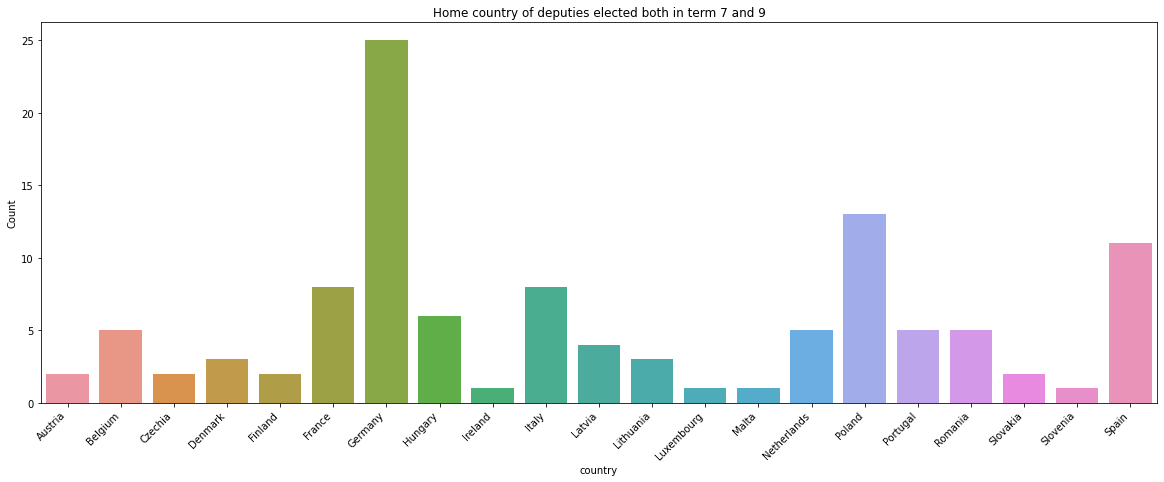

In [129]:
df_plt3 = members79.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c2 = sns.barplot(x = df_plt3.index, y = 'Count', data = df_plt3)
c2.set(title='Home country of deputies elected both in term 7 and 9')
c2.set_xticklabels(c2.get_xticklabels(), rotation=45, horizontalalignment='right')
c2.set_ylabel('Count')

In [ ]:
# Members of term 8 re-elected just for term 9

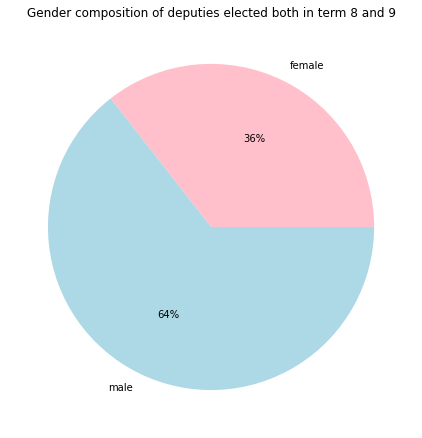

In [130]:
df_plt4 = members89.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt4['Count'], labels = df_plt4.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 8 and 9')
plt.savefig("gender4.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

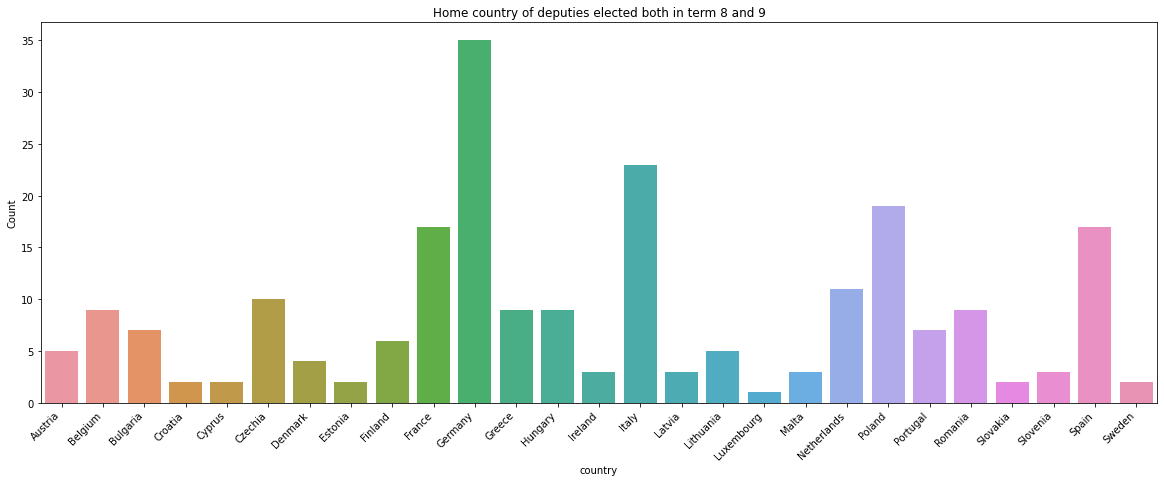

In [131]:
df_plt4 = members89.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c3 = sns.barplot(x = df_plt4.index, y = 'Count', data = df_plt4)
c3.set(title='Home country of deputies elected both in term 8 and 9')
c3.set_xticklabels(c3.get_xticklabels(), rotation=45, horizontalalignment='right')
c3.set_ylabel('Count')